# Integración simbólica 1D

In [1]:
import sympy as sym
sym.init_printing()
x = sym.Symbol('x')

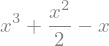

In [2]:
# Función polinómica
sym.integrate(3* x**2 + x - 1, x)

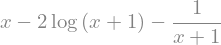

In [3]:
# Función racional
sym.integrate(x**2/(x**2 + 2 * x + 1), x)

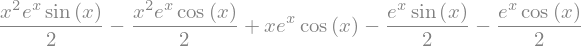

In [4]:
# Función polinómica-exponencial
sym.integrate(x**2 * sym.exp(x) * sym.sin(x), x)

In [5]:
# Integral definida
f = 4 * sym.sqrt(1 - x**2)
a, b = -1, 1
valor_simb = sym.integrate(f, (x, a, b))
valor_simb

##  Integración numérica con precisión arbitraria

In [6]:
import mpmath
mpmath.mp.dps = 50
f_mpmath = sym.lambdify(x, f, 'mpmath')

In [7]:
valor_num = mpmath.quad(f_mpmath, (a, b))
sym.sympify(valor_num)

In [8]:
sym.N(valor_simb, mpmath.mp.dps + 1) - valor_num

## Transformaciones integrales

### Transformada de Laplace

In [9]:
s = sym.symbols("s")
a, t = sym.symbols("a, t", positive=True)
f = sym.exp(-a*t)

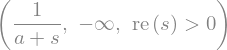

In [10]:
sym.laplace_transform(f, t, s)

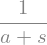

In [11]:
F = sym.laplace_transform(f, t, s, noconds=True)
F

In [12]:
sym.inverse_laplace_transform(F, s, t, noconds=True)

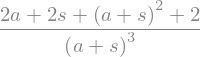

In [13]:
f = sym.exp(-a*t)*(1 + t)**2
F = sym.laplace_transform(f, t, s, noconds=True)
F

In [14]:
sym.inverse_laplace_transform(F, s, t, noconds=True)

### Transformada de Fourier

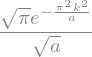

In [15]:
x, k = sym.symbols("x, k")
f = sym.exp(-a * x**2)
F = sym.fourier_transform(f, x, k)
F

In [16]:
sym.inverse_fourier_transform(F, k, x)

# Regla de Simpson

In [17]:
a, b, x = sym.symbols("a, b, x")
f = sym.Function("f")

In [18]:
# Abscisas (x) y pesos (w) de la regla de Simpson
abs_x = a, (a + b)/2, b 
w = [sym.symbols(f"w_{i}") for i in range(len(abs_x))]

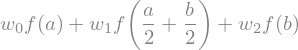

In [19]:
simpson = sum(w[i] * f(abs_x[i]) for i in range(len(abs_x)))
simpson

In [20]:
phi = [sym.Lambda(x, x**n) for n in range(len(abs_x))]
phi

In [21]:
ecs = [simpson.subs(f, phi[n]) - sym.integrate(phi[n](x), (x, a, b)) for n in range(len(abs_x))]
ecs[0]    

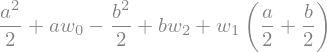

In [22]:
ecs[1]

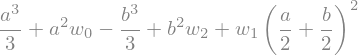

In [23]:
ecs[2]

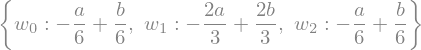

In [24]:
ecs_sol = sym.solve(ecs, w)
ecs_sol

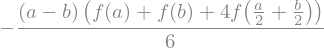

In [25]:
simpson.subs(ecs_sol).simplify()

# Cuadraturas gaussianas 

In [26]:
abs_x = [sym.symbols(f"x_{i}") for i in range(2)]
w = [sym.symbols(f"w_{i}") for i in range(len(abs_x))]

In [27]:
GL = sum(w[i] * f(abs_x[i]) for i in range(len(abs_x)))
GL

In [28]:
phiGL = [sym.Lambda(x, x**n) for n in range(4)]
phiGL

In [29]:
ecsGL = [GL.subs(f, phiGL[n]) - sym.integrate(phiGL[n](x), (x, -1, 1)) for n in range(4)]
ecsGL[0]

In [30]:
ecsGL[1]

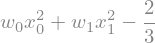

In [31]:
ecsGL[2]

In [32]:
ecsGL[3]

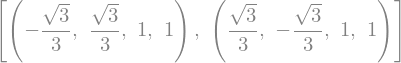

In [33]:
y = abs_x + w
ecsGL_sol = sym.solve(ecsGL, y)
ecsGL_sol


### Copyright 2020-2021 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

